In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import warnings module
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Version printing
print(f'Pandas version:',pd.__version__)
import sys
print(f'Python version:',sys.version)
import matplotlib
print(f'Matplotlib Version:', matplotlib.__version__)
print(f'Seaborn Version:', sns.__version__)

Pandas version: 2.2.2
Python version: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
Matplotlib Version: 3.10.0
Seaborn Version: 0.13.2


In [4]:
#Read the dataset
ld = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/loan.csv')

# **Part 1 DATA CLEANING & INITIAL ASSESSMENT**

**Check dataset**

In [5]:
# Check the data shape
ld.shape

(39717, 111)

In [6]:
# Check dataset meta information
ld.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

**Drop na values**

In [7]:
# there are many columns which have all value na.
# lets find all column which have 20 % of value as null and drop them. => I changed to 20% since it's a popular benchmark, 65% is too

na_percentage = 100*(ld.isnull().sum()/len(ld.index))
na_col_index = ld.loc[:,list((na_percentage>20))].columns
na_col_index
# we will drop these column.

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
     

In [8]:
#dropping all those columns
ld.drop(columns= na_col_index, inplace=True)

In [9]:
# Find columns where all values are 0
zero_columns = ld.columns[(ld == 0).all()]
zero_columns

Index(['acc_now_delinq', 'delinq_amnt'], dtype='object')

In [10]:
#dropping all zero column column
ld.drop(columns= zero_columns, inplace=True)

In [11]:
ld = ld.reset_index(drop=True)

**Drop single-value columns with no statiscal value**

In [12]:
#find any more column that have single irrelevant data
columns_with_single_value = ld.columns[(ld.nunique() == 1)]
columns_with_single_value

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'chargeoff_within_12_mths',
       'tax_liens'],
      dtype='object')

In [13]:
#dropping all zero column column
ld.drop(columns= columns_with_single_value, inplace=True)

In [ ]:
ld = ld.reset_index(drop=True)

**Drop administrative fields**
as they are index variables with unique values and do not contribute to the analysis.

In [14]:
# List of administrative columns
admin_list=['id','member_id', 'emp_title','title','url','zip_code']

In [15]:
# Drop those columns
ld.drop(columns=admin_list, inplace=True)

**Standardize the datatypes**

In [16]:
# Check the data type of the dataset
ld.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

In [17]:
# Checking the dataset in full content
pd.set_option('display.max_columns', None) #Display all columns
pd.set_option('display.max_colwidth', None) #Display full content without truncating
ld.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


**int_rate**

In [18]:
# Converting into the corect float format without % symbol
ld.int_rate =  ld.int_rate.apply(lambda x: str(x).replace('%', '')).astype(float)

**term**

In [19]:
# Change into interger format without the "months" for statistic calculation
ld.term = ld.term.apply(lambda x: str(x).replace('months','').strip()).astype(int)

**addr_state**

In [20]:
# Get top 10 states by count
top_10_states = ld.addr_state.value_counts().nlargest(10).index.tolist()

# Apply lambda to create new grouping
ld.addr_state = ld.addr_state.apply(lambda x: x if x in top_10_states else 'Others')
ld.addr_state.value_counts()

,count
addr_state,
Others,14176
CA,7099
NY,3812
FL,2866
TX,2727
NJ,1850
IL,1525
PA,1517
VA,1407


**emp_length**

In [24]:
# Check the na value
ld.emp_length.isna().sum()/len(ld)*100

2.7066495455346575

In [22]:
# Check the values
ld.emp_length.value_counts()

,count
emp_length,
10+ years,8879
< 1 year,4583
2 years,4388
3 years,4095
4 years,3436
5 years,3282
1 year,3240
6 years,2229
7 years,1773


In [ ]:
# Small missing quantity, It's categorial values, so we can compute na values with mode
ld.emp_length = ld.emp_length.fillna(ld.emp_length.mode()[0])
ld.emp_length.isna().sum()

0

In [25]:
# Recategorize employment length subgroups to simplify the data
ld.emp_length = ld.emp_length.apply(lambda x:'10+ years' if x == '10+ years'
                                            else '5-10 years' if x in ['9 years', '8 years', '7 years', '6 years']
                                            else '3-5 years' if x in ['5 years', '4 years', '3 years']
                                            else '1-3 years' if x in ['2 years', '1 year']
                                            else '< 1 year' if x == '< 1 year'
                                            else x)

In [26]:
ld.emp_length.value_counts()

,count
emp_length,
3-5 years,10813
10+ years,8879
1-3 years,7628
5-10 years,6739
< 1 year,4583


**revol_util**

In [27]:
# Check the na value
ld.revol_util.isna().sum()/len(ld)*100

0.12589067653649572

In [28]:
# Check the datatypes
ld.revol_util.dtype

dtype('O')

In [29]:
# Check the values
ld.revol_util.value_counts()

,count
revol_util,
0%,977
0.20%,63
63%,62
40.70%,58
66.70%,58
...,...
25.74%,1
47.36%,1
24.65%,1


In [30]:
# The columns has a string value instead of float with % symnbol.
# There are small missing values which we can impute with mean

In [31]:
# Converting into the corect float format without % symbol
ld.revol_util =  ld.revol_util.apply(lambda x: str(x).replace('%', '')).astype(float)

In [32]:
# Fill the na value with mean
ld.revol_util = ld.revol_util.fillna(ld.revol_util.mean())
ld.revol_util.isna().sum()

0

**home_ownership**

In [33]:
# Check the values of home_ownership
ld.home_ownership.value_counts()

,count
home_ownership,
RENT,18899
MORTGAGE,17659
OWN,3058
OTHER,98
NONE,3


In [34]:
# None and Other can be combined into one to simplify the categories
ld.home_ownership = ld.home_ownership.apply(lambda x: 'OTHER' if x == 'NONE' else x)
ld.home_ownership.value_counts()

,count
home_ownership,
RENT,18899
MORTGAGE,17659
OWN,3058
OTHER,101


**issue_d**

In [35]:
# Convert 'issue_d' to datetime
ld.issue_d = pd.to_datetime(ld.issue_d, format='%b-%y').dt.to_period('M')

**earliest_cr_line**

In [36]:
# Convert 'earliest_cr_line' to datetime
ld.earliest_cr_line = pd.to_datetime(ld.earliest_cr_line, format='%b-%y').dt.to_period('M')

**last_pymnt_d**

In [37]:
# Convert 'last_pymnt_d' to datetime
ld.last_pymnt_d = pd.to_datetime(ld.last_pymnt_d, format='%b-%y').dt.to_period('M')

In [38]:
# There are some small missing values. Checking which rows having the missing last payment date
ld[ld.last_pymnt_d.isna()].loan_status.value_counts()

,count
loan_status,
Charged Off,71


In [39]:
# They all are 71 loan defaulted, so the missing payment date is logical.
# Few missing values (<1%) so we can drop them
ld = ld.dropna(subset=['last_pymnt_d'])
ld.last_pymnt_d.isna().sum()

0

In [40]:
ld = ld.reset_index(drop=True)

**last_credit_pull_d**

In [41]:
# Convert 'last_credit_pull_d' to datetime
ld.last_credit_pull_d = pd.to_datetime(ld.last_credit_pull_d, format='%b-%y').dt.to_period('M')

In [42]:
# There are some small missing values. Checking which rows having the missing last credit_pull
ld[ld.last_credit_pull_d.isna()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
25983,5000,5000,5000.0,36,11.12,163.98,B,B3,3-5 years,RENT,96000.0,Not Verified,2010-09,Charged Off,small_business,CA,4.04,0,1997-10,0,4,0,7172,80.6,9,0.0,0.0,3362.960000,3362.96,2553.55,702.45,0.0,106.96,1.34,2012-06,163.98,NaT,0.0
39405,1000,1000,875.0,36,7.12,30.94,A,A1,< 1 year,MORTGAGE,120000.0,Not Verified,2007-12,Fully Paid,other,CA,0.65,0,1997-07,1,7,0,2227,3.8,37,0.0,0.0,1110.813028,971.96,1000.00,110.81,0.0,0.00,0.00,2010-08,185.80,NaT,NaN


In [43]:
# Only 2 rows have missing values (<1%) so we can drop them
ld = ld.dropna(subset=['last_credit_pull_d'])
ld.last_credit_pull_d.isna().sum()

0

In [44]:
ld = ld.reset_index(drop=True)

**pub_rec_bankruptcies**

In [45]:
# Check the na value
ld.pub_rec_bankruptcies.isna().sum()/ld.shape[0]*100

1.755625063061245

In [46]:
ld[ld.pub_rec_bankruptcies.isna()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
34941,15000,15000,14875.000000,36,8.94,476.58,A,A5,< 1 year,MORTGAGE,110000.0,Not Verified,2009-09,Fully Paid,credit_card,NY,7.07,0,1991-11,1,6,0,7586,52.7,19,0.0,0.0,17135.510230,16992.71,15000.00,2135.51,0.0,0.0,0.0,2012-07,1919.13,2015-08,NaN
34993,3000,3000,2988.236621,36,14.26,102.92,C,C5,3-5 years,MORTGAGE,80800.0,Not Verified,2009-09,Fully Paid,credit_card,TX,14.97,1,1998-07,0,13,0,4740,39.5,23,0.0,0.0,3704.997650,3688.85,3000.00,705.00,0.0,0.0,0.0,2012-10,111.23,2012-09,NaN
35295,4000,4000,3892.258856,36,11.14,131.22,B,B1,< 1 year,MORTGAGE,60000.0,Not Verified,2009-08,Charged Off,car,Others,11.08,0,1995-08,0,14,0,24220,68.6,33,0.0,0.0,2755.200000,2615.80,2170.35,584.85,0.0,0.0,0.0,2011-06,131.22,2016-05,NaN
38371,2300,2300,589.605658,36,13.17,77.69,D,D2,10+ years,RENT,37152.0,Verified,2008-08,Fully Paid,moving,NJ,2.26,0,1997-12,0,4,0,2211,88.4,13,0.0,0.0,2796.601136,643.50,2300.00,496.60,0.0,0.0,0.0,2011-09,77.78,2016-05,NaN
38645,6000,6000,500.000000,36,8.00,188.02,A,A3,< 1 year,MORTGAGE,75000.0,Not Verified,2008-05,Fully Paid,other,Others,16.08,0,1994-12,1,16,0,29797,23.2,39,0.0,0.0,6783.750468,565.31,5999.99,768.76,15.0,0.0,0.0,2011-05,189.36,2011-05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,2500,2500,1075.000000,36,8.07,78.42,A,A4,3-5 years,MORTGAGE,110000.0,Not Verified,2007-07,Fully Paid,home_improvement,Others,11.33,0,1990-11,0,13,0,7274,13.1,40,0.0,0.0,2822.969293,1213.88,2500.00,322.97,0.0,0.0,0.0,2010-07,80.90,2010-06,NaN
39640,8500,8500,875.000000,36,10.28,275.38,C,C1,3-5 years,RENT,18000.0,Not Verified,2007-07,Fully Paid,credit_card,Others,6.40,1,1986-12,1,6,0,8847,26.9,9,0.0,0.0,9913.491822,1020.51,8500.00,1413.49,0.0,0.0,0.0,2010-07,281.94,2010-07,NaN
39641,5000,5000,1325.000000,36,8.07,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,2007-07,Fully Paid,debt_consolidation,MA,2.30,0,1998-10,0,11,0,9698,19.4,20,0.0,0.0,5272.161128,1397.12,5000.00,272.16,0.0,0.0,0.0,2008-04,0.00,2007-06,NaN
39642,5000,5000,650.000000,36,7.43,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,2007-07,Fully Paid,other,Others,3.72,0,1988-11,0,17,0,85607,0.7,26,0.0,0.0,5174.198551,672.66,5000.00,174.20,0.0,0.0,0.0,2008-01,0.00,2007-06,NaN


In [47]:
# There are around 2% missing values, of which mostly are fully paid clients.
ld[ld.pub_rec_bankruptcies.isna()].loan_status.value_counts()

,count
loan_status,
Fully Paid,578
Charged Off,118


In [48]:
# Since bankruptcies are rare events and missing could mean no bankruptcies, and the missing is not huge, we can impute with 0
ld.pub_rec_bankruptcies.fillna(0, inplace=True)
ld.pub_rec_bankruptcies.isna().sum()

0

In [49]:
# The number of bankcrupties should be integer, instead of float format
ld.pub_rec_bankruptcies = ld.pub_rec_bankruptcies.astype(int)

------------

# **Part 2 ANALYSIS**

In [50]:
ld.loan_status.value_counts()

,count
loan_status,
Fully Paid,32949
Charged Off,5555
Current,1140


**Defaulters / non-defaulters**

In [51]:
# Create a target variable to classify the defaulters with non-defaulters based on the locan status
ld['is_default'] = ld.loan_status.apply(lambda x: 0 if x in ['Fully Paid', 'Current'] else 1)
ld.is_default.value_counts()

,count
is_default,
0,34089
1,5555


**Percentage of defaulters**

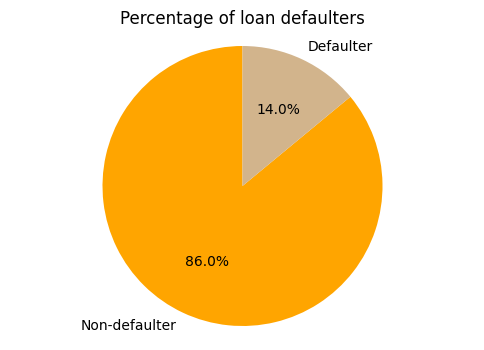

In [52]:
# Calculate the data counting to get the percentage of defaulters
pie_default=ld.is_default.value_counts(normalize=True).round(2)
# Create the pie chart with titles, labels
value_names={0:'Non-defaulter',1:'Defaulter'}
labels = pie_default.index.map(value_names)
plt.figure(figsize=(6, 4))
plt.pie(pie_default, labels=labels, autopct='%1.1f%%', startangle=90, colors=['orange','tan'])
plt.axis('equal')
plt.title('Percentage of loan defaulters')
plt.show()

**Borrower demographics of defaulters vs. non-defaulters**

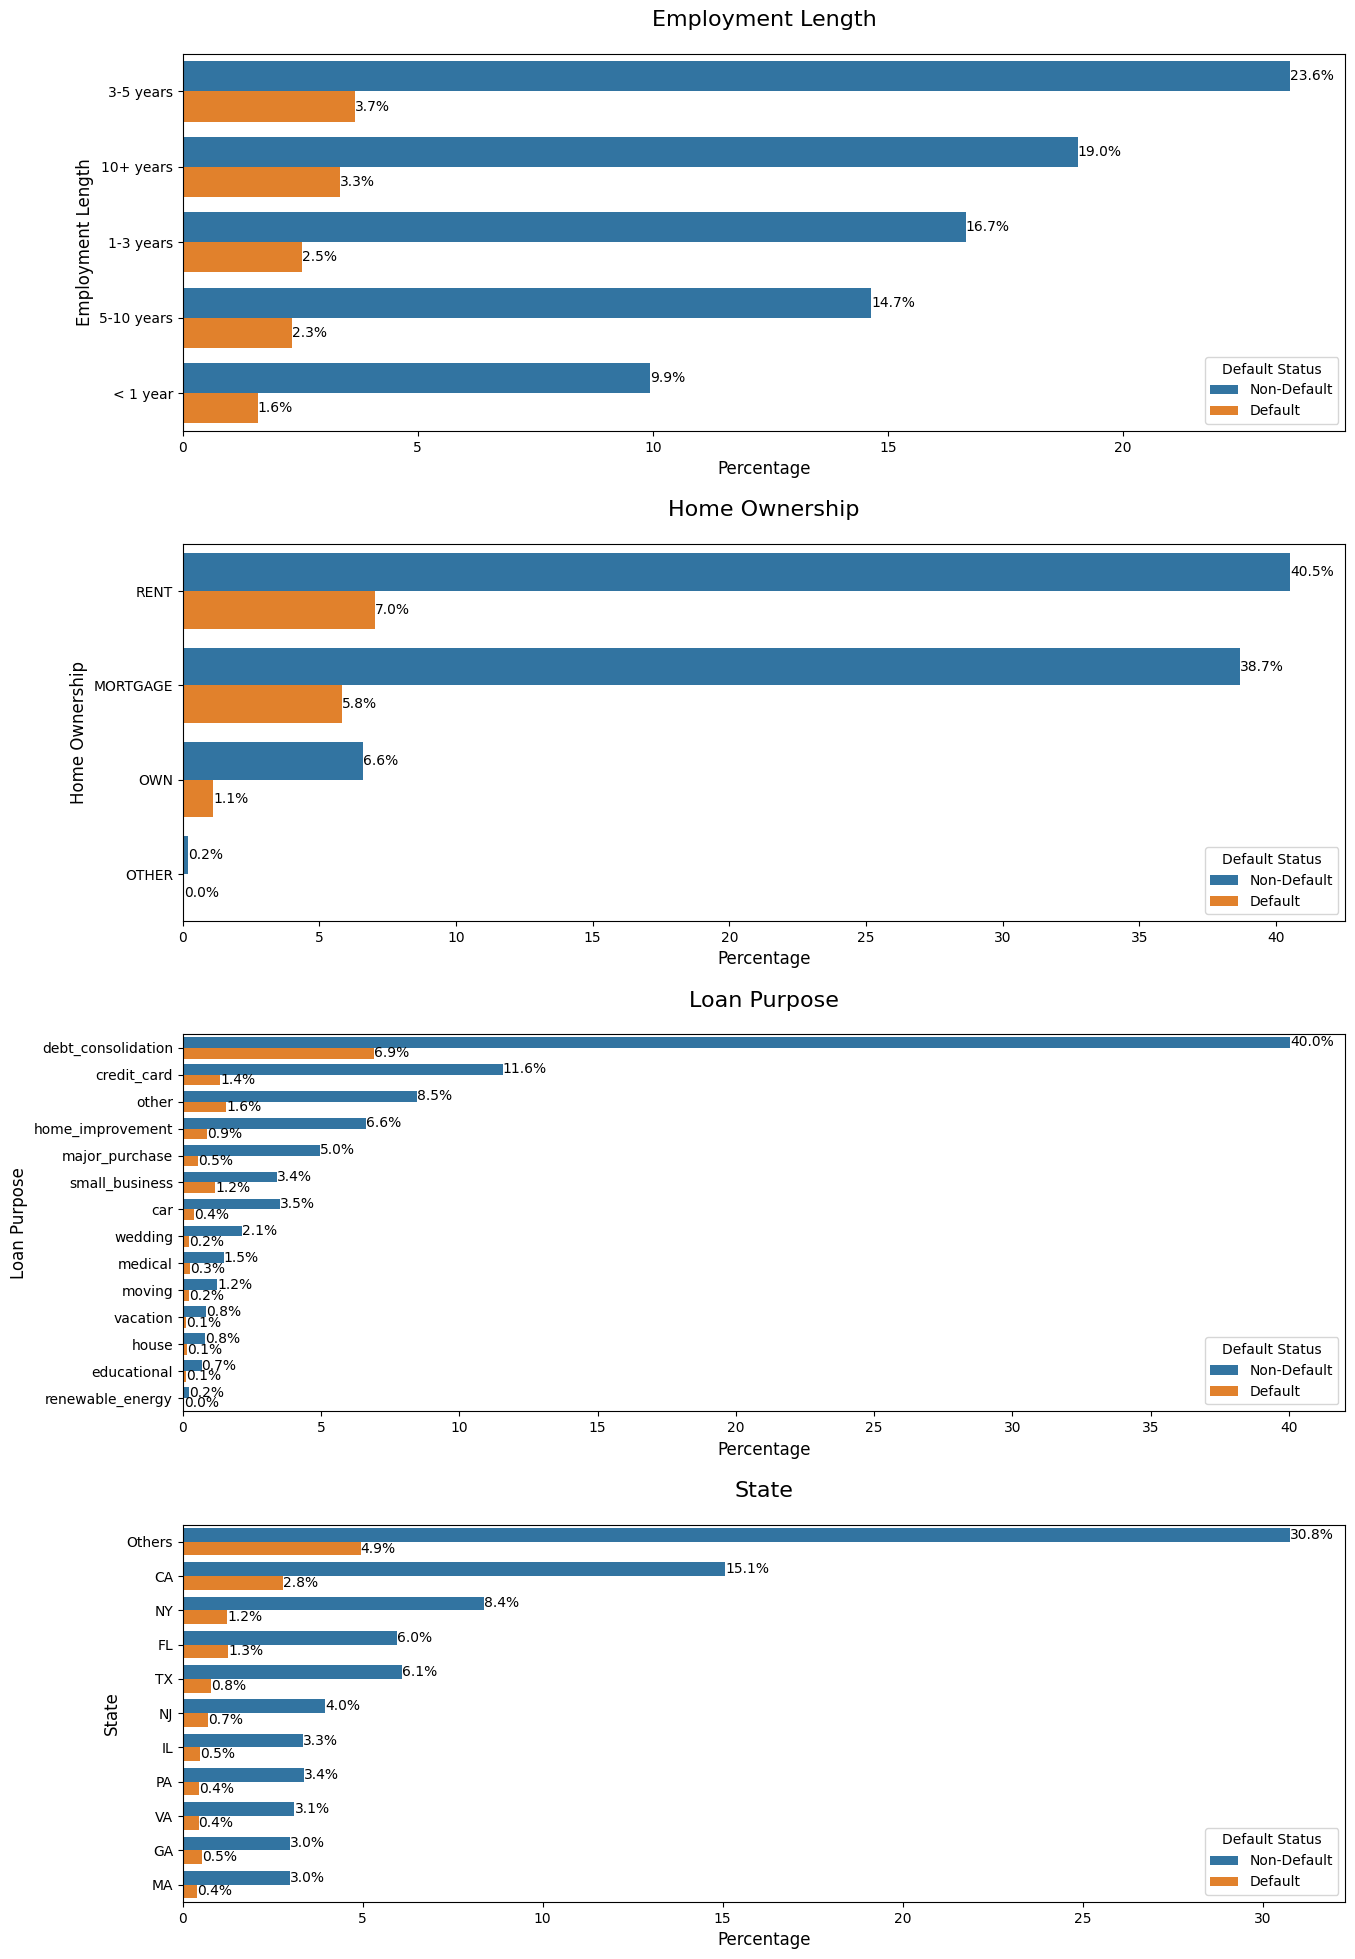

In [53]:
# Create subplots for all categorical demographic variables
demo_cat = [
            {'key': 'emp_length', 'value': 'Employment Length'},
            {'key': 'home_ownership', 'value': 'Home Ownership'},
            {'key': 'purpose', 'value': 'Loan Purpose'},
            {'key': 'addr_state', 'value': 'State'},]
num_plots = len(demo_cat)
fig, axes = plt.subplots(num_plots, 1, figsize=(15, 6*num_plots))
plt.subplots_adjust(hspace=0.3)

# Plot for each categorical variable
for idx, item in enumerate(demo_cat):
    # Get data
    key = item['key']
    value = item['value']
    hue_order = ld.is_default.value_counts().index.tolist()

    # Create countplot
    ax = sns.countplot(data=ld,
                      y=key,
                      hue='is_default',
                      hue_order=hue_order,
                      stat='percent',
                      order=ld[key].value_counts().index,
                      ax=axes[idx])

    # Customize plot
    axes[idx].set_title(f'{value}', size=16, pad=20)
    axes[idx].set_xlabel('Percentage', size=12)
    axes[idx].set_ylabel(value, size=12)

    # Add percentage labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%')

    # Customize legend
    axes[idx].legend(title='Default Status',
                    labels=['Non-Default', 'Default'],
                    loc='lower right',
                    fontsize=10)


**Correlation between income and default rates**

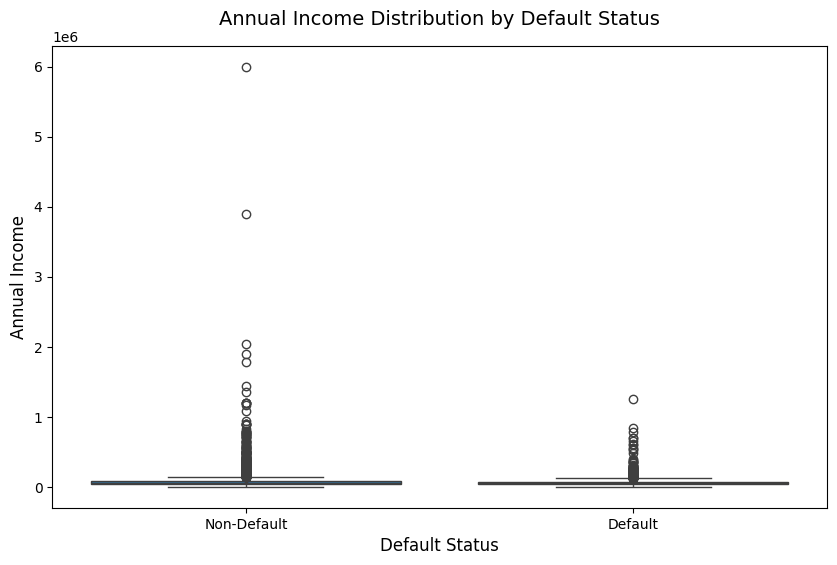

In [55]:
# Annual income distribution
# Set style
plt.figure(figsize=(10, 6))

# Create boxplot
sns.boxplot(data=ld, x='is_default', y='annual_inc')

# Customize plot
plt.title('Annual Income Distribution by Default Status', pad=15, size=14)
plt.xlabel('Default Status', size=12)
plt.ylabel('Annual Income', size=12)
plt.xticks([0, 1], ['Non-Default', 'Default'])

plt.show()

In [56]:
# Create income brackets
ld['income_bracket'] = pd.cut(ld.annual_inc,
                            bins=[0, 30000, 50000, 75000, 100000, float('inf')],
                            labels=['<30k', '30k-50k', '50k-75k', '75k-100k', '>100k'])

In [57]:
ld.income_bracket.value_counts()

,count
income_bracket,
50k-75k,12009
30k-50k,11101
75k-100k,6250
>100k,5685
<30k,4599


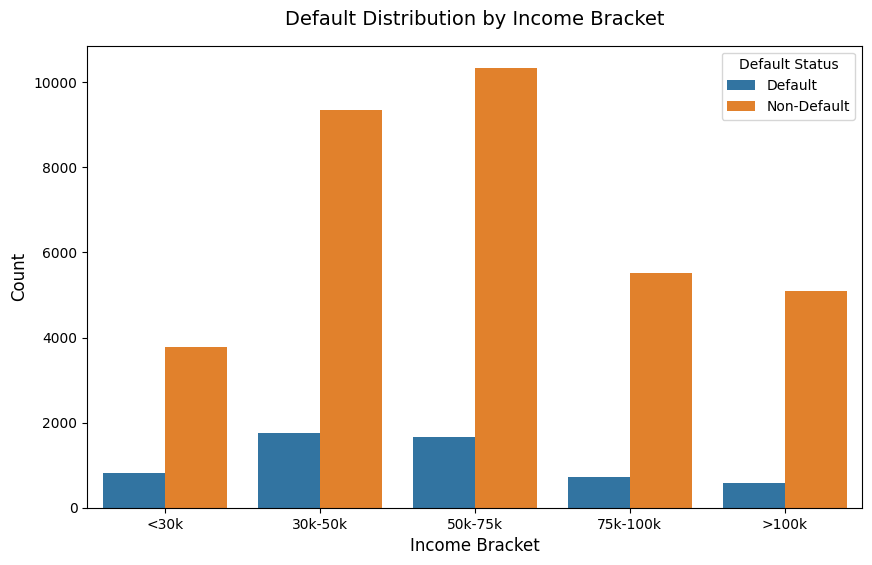

In [58]:
# Default rates distributed amongst different income brackets

# Create countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=ld, x='income_bracket', hue='is_default', hue_order=[1,0])

# Customize plot
plt.title('Default Distribution by Income Bracket', pad=15, size=14)
plt.xlabel('Income Bracket', size=12)
plt.ylabel('Count', size=12)

# Customize legend
plt.legend(title='Default Status', labels=['Default', 'Non-Default'], loc='upper right', fontsize=10)

**Loan Characteristics of defaulters**

In [59]:
ld_default=ld[ld.is_default == 1]

In [60]:
ld_default.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,is_default,income_bracket
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12,Charged Off,car,GA,1.00,0,1999-04,5,3,0,1687,9.4,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.1100,2013-04,119.66,2013-09,0,1,<30k
8,5600,5600,5600.0,60,21.28,152.39,F,F2,3-5 years,OWN,40000.0,Source Verified,2011-12,Charged Off,small_business,CA,5.55,0,2004-04,2,11,0,5210,32.6,13,0.0,0.0,646.02,646.02,162.02,294.94,0.0,189.06,2.0900,2012-04,152.39,2012-08,0,1,30k-50k
9,5375,5375,5350.0,60,12.69,121.45,B,B5,< 1 year,RENT,15000.0,Verified,2011-12,Charged Off,other,TX,18.08,0,2004-09,0,2,0,9279,36.5,3,0.0,0.0,1476.19,1469.34,673.48,533.42,0.0,269.29,2.5200,2012-11,121.45,2013-03,0,1,<30k
12,9000,9000,9000.0,36,13.49,305.38,C,C1,< 1 year,RENT,30000.0,Source Verified,2011-12,Charged Off,debt_consolidation,VA,10.08,0,2004-04,1,4,0,10452,91.7,9,0.0,0.0,2270.70,2270.70,1256.14,570.26,0.0,444.30,4.1600,2012-07,305.38,2012-11,0,1,<30k
14,10000,10000,10000.0,36,10.65,325.74,B,B2,3-5 years,RENT,100000.0,Source Verified,2011-12,Charged Off,other,CA,7.06,0,1991-05,2,14,0,11997,55.5,29,0.0,0.0,7471.99,7471.99,5433.47,1393.42,0.0,645.10,6.3145,2013-10,325.74,2014-03,0,1,75k-100k


In [61]:
ld_default.shape

(5555, 40)

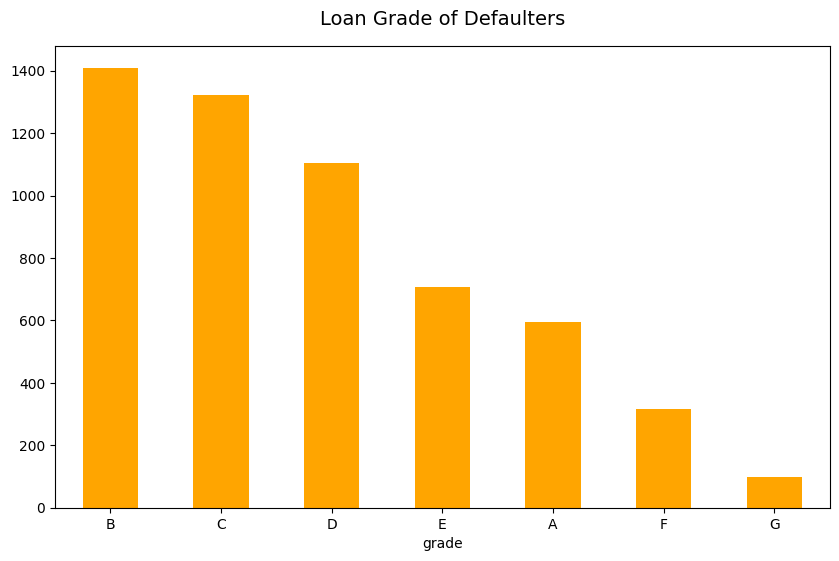

In [64]:
# Loan Grade of defaulters
plt.figure(figsize=(10, 6))
ld_default.grade.value_counts().plot(kind='bar', color='orange')
plt.xticks(rotation=0)
plt.title('Loan Grade of Defaulters', pad=15, size=14)
plt.show()

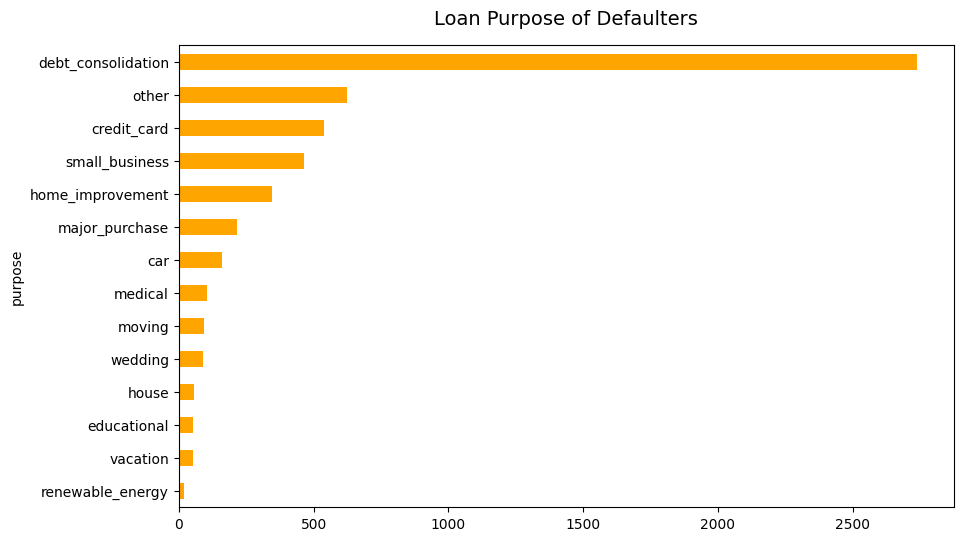

In [67]:
# Loan Purpose of defaulters
plt.figure(figsize=(10, 6))
ld_default.purpose.value_counts().sort_values(ascending=True).plot(kind='barh', color='orange')
plt.xticks(rotation=0)
plt.title('Loan Purpose of Defaulters', pad=15, size=14)
plt.show()

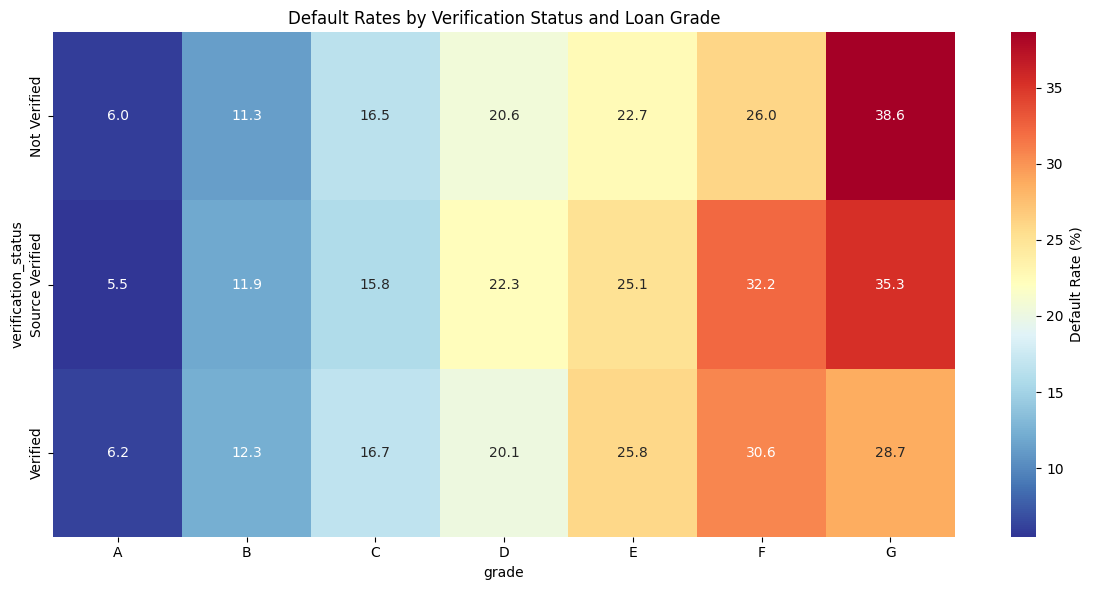


Summary Statistics by Verification Status:
                    is_default        int_rate  loan_amnt
                         count   mean     mean       mean
verification_status                                      
Not Verified             16882  0.125   11.201   8426.736
Source Verified           9973  0.142   12.101  10102.868
Verified                 12789  0.159   13.031  15794.100


In [68]:
# Verification status vs. Grade loan, Interest Rate and Loan amount
plt.figure(figsize=(12, 6))
heatmap_data = pd.crosstab(ld['verification_status'],
                          ld['grade'],
                          values=ld['is_default'],
                          aggfunc='mean') * 100

sns.heatmap(heatmap_data,
           annot=True,
           fmt='.1f',
           cmap='RdYlBu_r',
           cbar_kws={'label': 'Default Rate (%)'})

plt.title('Default Rates by Verification Status and Loan Grade')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics by Verification Status:")
summary = ld.groupby('verification_status').agg({
    'is_default': ['count', 'mean'],
    'int_rate': 'mean',
    'loan_amnt': 'mean'
}).round(3)

print(summary)

In [69]:
# Convert verification status into numeric to calculate corellation with default rate
verification_status_map = {'Source Verified':1, 'Verified':2, 'Not Verified':3}
ld['verification_status_num'] = ld.verification_status.apply(lambda x: verification_status_map[x])

In [70]:
# Convert grade loan into numeric to calculate corellation with default rate
grade_map = {'A': 1,'B': 2,'C': 3,'D': 4,'E': 5,'F': 6,'G': 7}
ld['grade_num'] = ld.grade.apply(lambda x: grade_map[x])

In [71]:
# Calculate correlations of Loan Characteristics with default rates

# List of loan variables to check corellations
loan_num = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade_num', 'verification_status_num']

# Calculate correlations with default rates
correlation1 = {}
for var in loan_num:
  corr = ld[var].corr(ld.is_default)
  correlation1[var] = round(corr,3)

# Convert the correlations dictionary to a DataFrame for charting
correlation1_df = pd.DataFrame.from_dict(correlation1,orient='index', columns=['Correlation'])

**Credit Profile of defaulters**

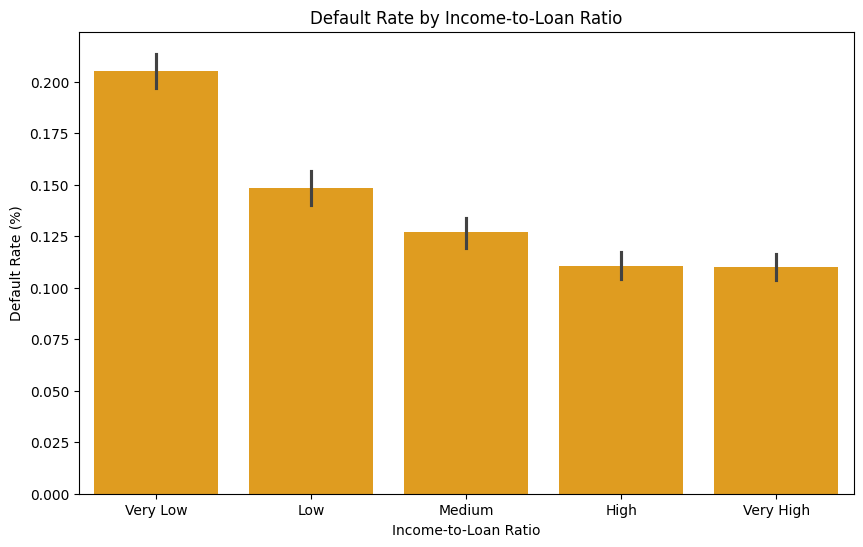

In [72]:
# Create income to loan ratio analysis
plt.figure(figsize=(10, 6))
ld['income_loan_ratio'] = ld.annual_inc / ld.loan_amnt
ld['ratio_bracket'] = pd.qcut(ld['income_loan_ratio'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

sns.barplot(data=ld, x='ratio_bracket', y='is_default', color='orange')
plt.title('Default Rate by Income-to-Loan Ratio')
plt.xlabel('Income-to-Loan Ratio')
plt.ylabel('Default Rate (%)')
plt.show()

Text(0, 0.5, 'Default Rate (%)')

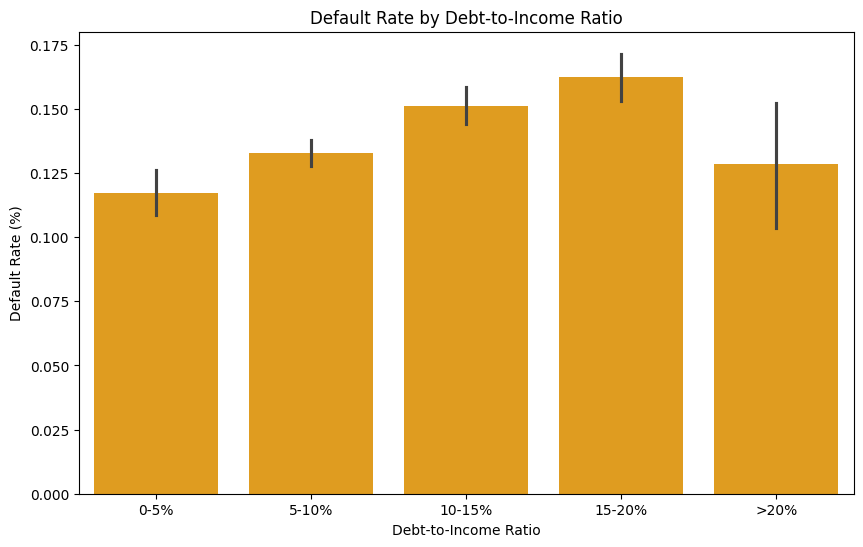

In [73]:
# Create debt-to-income ratio analysis
plt.figure(figsize=(10, 6))
ld['dti_bracket'] = pd.cut(ld.dti, bins=[0, 5, 15, 20, 25, float('inf')], labels=['0-5%', '5-10%', '10-15%', '15-20%', '>20%'])

sns.barplot(data=ld, x='dti_bracket', y='is_default',color='orange')
plt.title('Default Rate by Debt-to-Income Ratio')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Default Rate (%)')

In [74]:
# Calculate correlations of Credit Profile with default rates

# List of credit profile variables to check corellations
credit_num = ['delinq_2yrs','pub_rec','pub_rec_bankruptcies', 'income_loan_ratio', 'dti','open_acc','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv']

# Calculate correlations with default rates
correlation2 = {}
for var in credit_num:
  corr = ld[var].corr(ld.is_default)
  correlation2[var] = round(corr,3)

# Convert the correlations dictionary to a DataFrame for charting
correlation2_df = pd.DataFrame.from_dict(correlation2,orient='index', columns=['Correlation'])

**Payment Behavior of defaulters**

In [75]:
# Calculate correlations of Credit Profile with default rates

# List of credit profile variables to check corellations
payment_num = ['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt']

# Calculate correlations with default rates
correlation3 = {}
for var in payment_num:
  corr = ld[var].corr(ld.is_default)
  correlation3[var] = round(corr,3)

# Convert the correlations dictionary to a DataFrame for charting
correlation3_df = pd.DataFrame.from_dict(correlation3,orient='index', columns=['Correlation'])


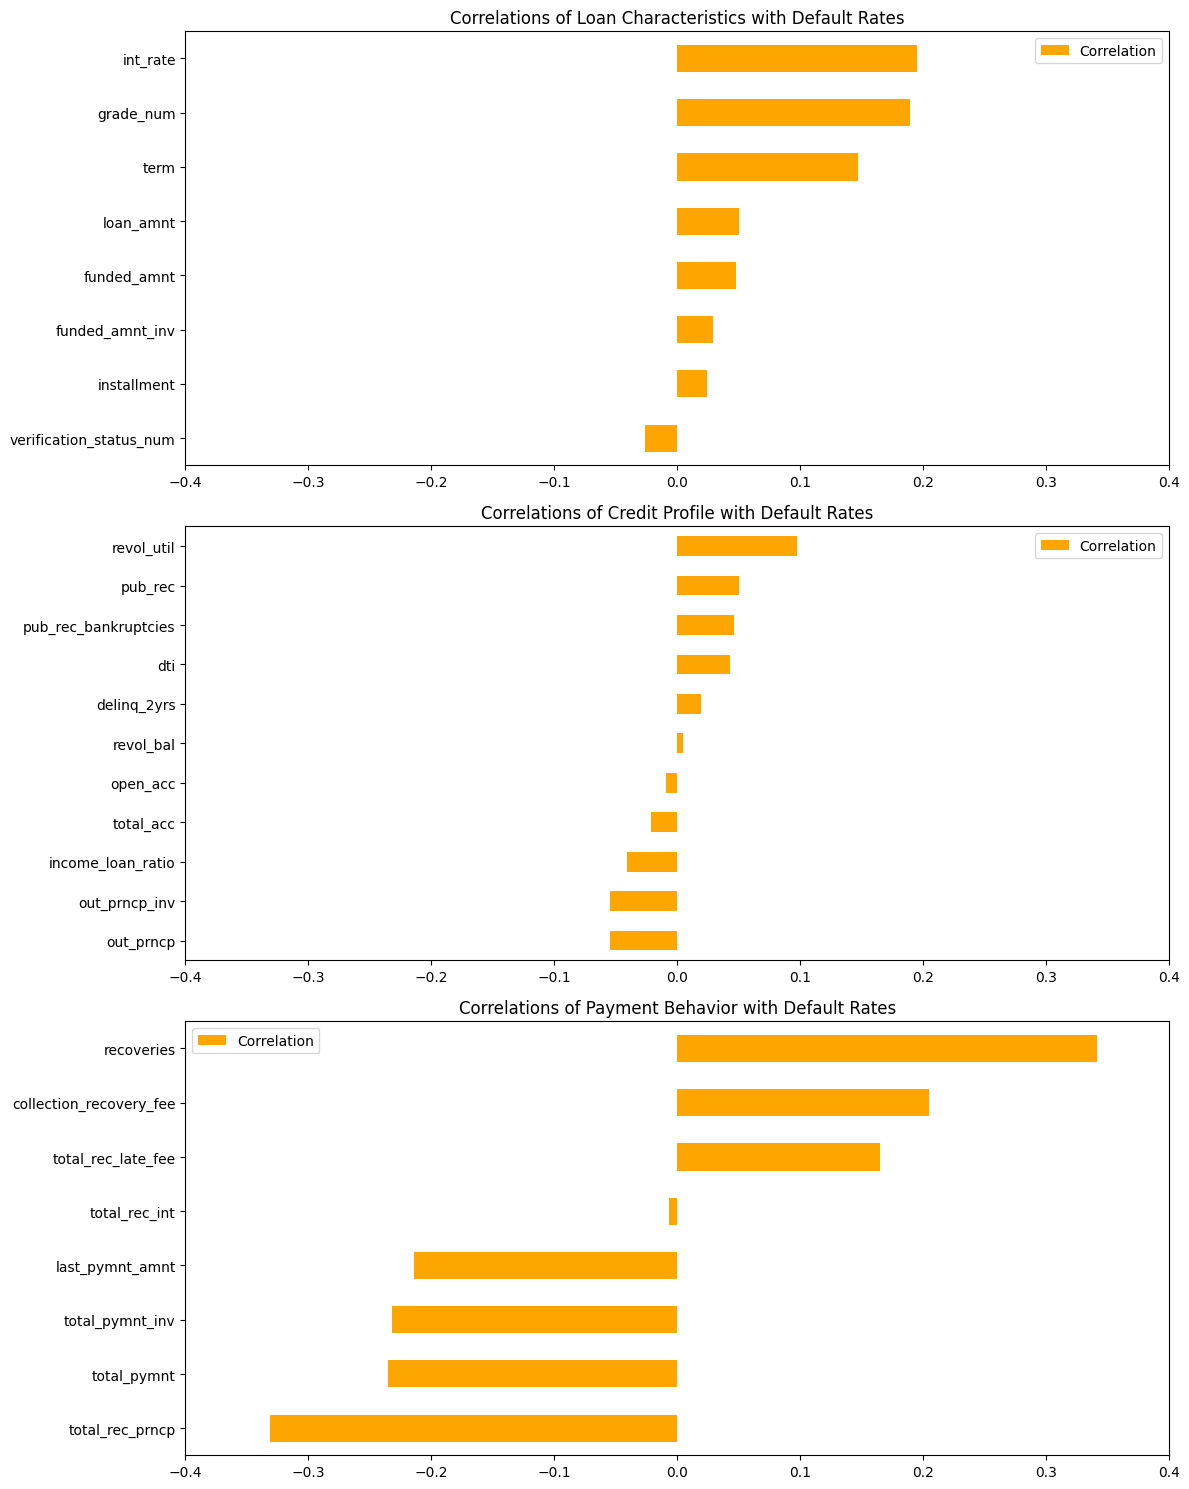

In [76]:
# Plot the correlation chart

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Plot 1: Loan Characteristics
correlation1_df.sort_values(by=['Correlation'], ascending=True).plot(
    kind='barh', color='orange', ax=ax1)
ax1.set_xlim(-0.4, 0.4)
ax1.set_title('Correlations of Loan Characteristics with Default Rates')

# Plot 2: Credit Profile
correlation2_df.sort_values(by=['Correlation'], ascending=True).plot(
    kind='barh', color='orange', ax=ax2)
ax2.set_xlim(-0.4, 0.4)
ax2.set_title('Correlations of Credit Profile with Default Rates')

# Plot 3: Payment Behavior
correlation3_df.sort_values(by=['Correlation'], ascending=True).plot(
    kind='barh', color='orange', ax=ax3)
ax3.set_xlim(-0.4, 0.4)
ax3.set_title('Correlations of Payment Behavior with Default Rates')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [77]:
# Focus on highest correlated variables
high_corr_vars = [
        'total_rec_prncp',          # Highest positive correlation
        'total_pymnt',              # High positive
        'total_pymnt_inv',          # High positive
        'last_pymnt_amnt',          # High positive
        'revol_util',               # Negative correlation
        'total_rec_late_fee',       # Negative correlation
        'collection_recovery_fee',  # Negative correlation
        'recoveries'                # Highest negative correlation

    ]

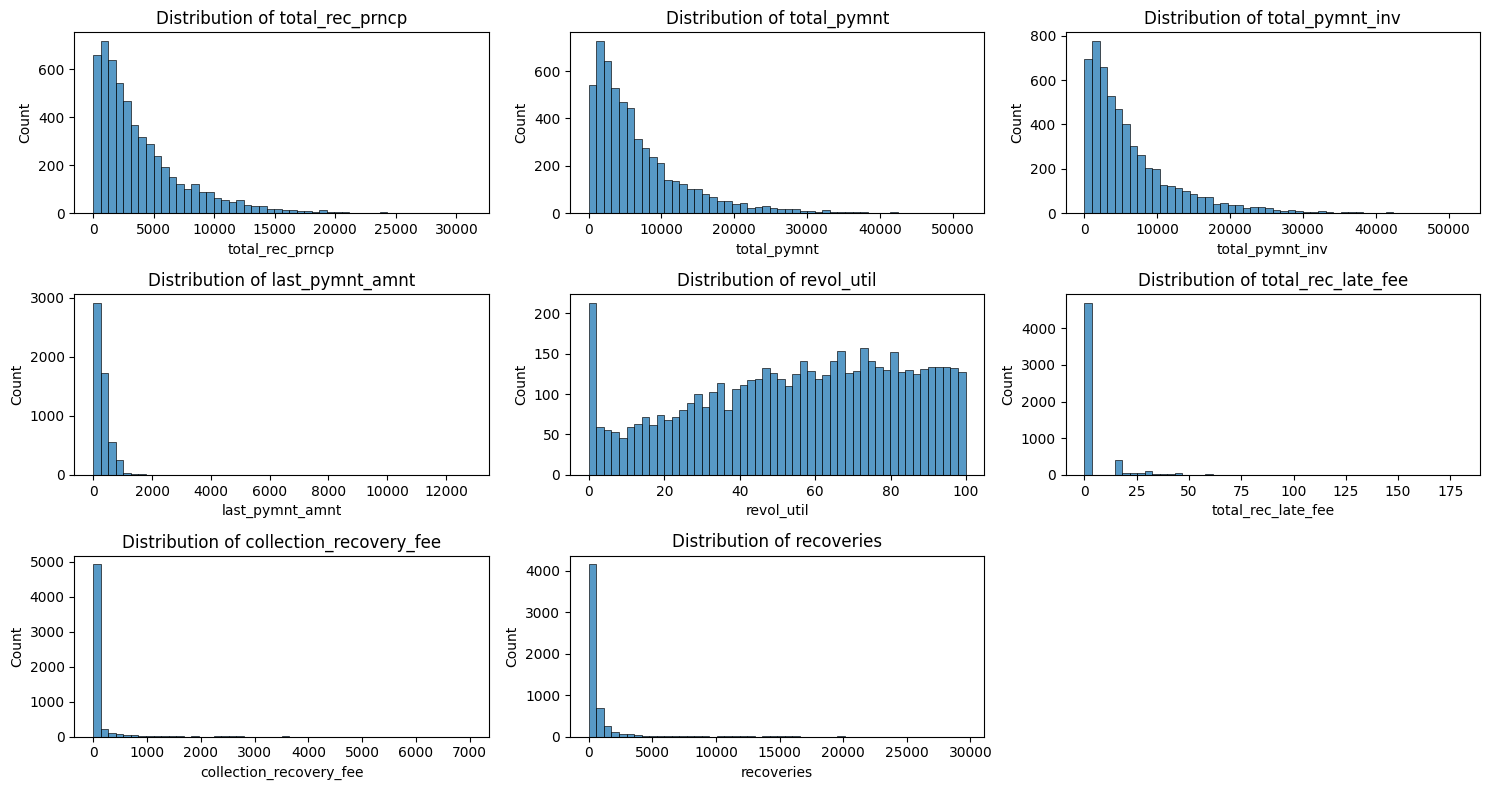

In [79]:
# Distribution Analysis of highest correlated variables for defaulters
plt.figure(figsize=(15, 8))
for i, var in enumerate(high_corr_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(ld_default[var], bins=50)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

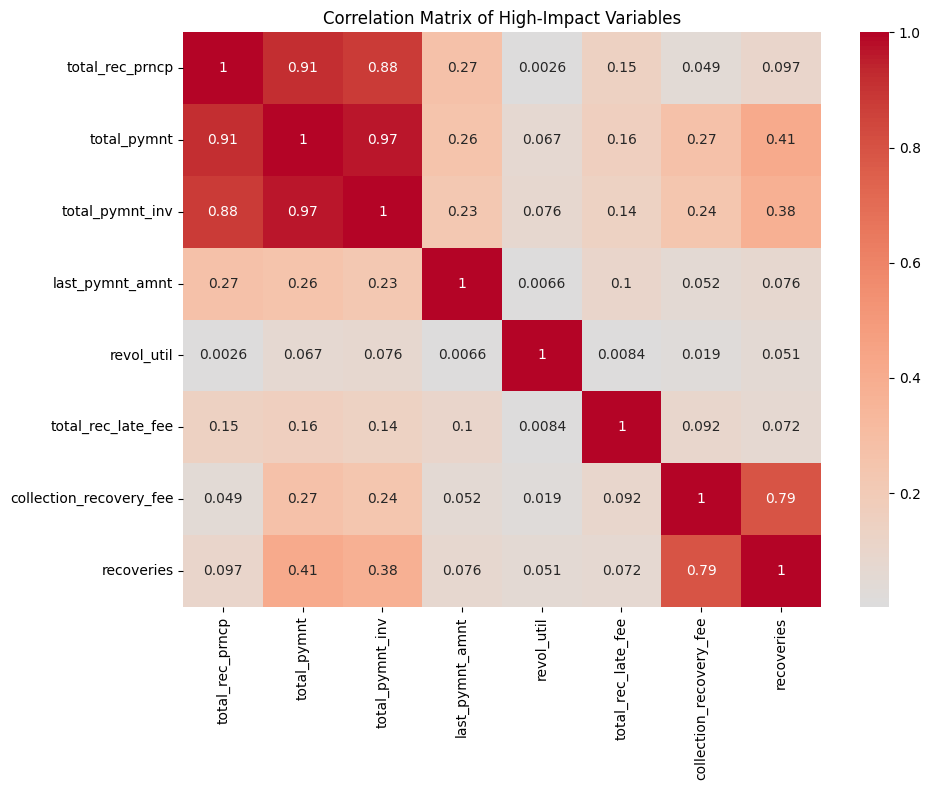

In [80]:
# Correlation Matrix for High-Correlation Variables
plt.figure(figsize=(10, 8))
correlation = ld_default[high_corr_vars].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of High-Impact Variables')
plt.tight_layout()
plt.show()